# Notes & Drafts

## Data Science


Measures of spread: 

- $Quartiles$: The spread of the data by breaking it into quartiles.

    - 1st quartile: Split data into four equal parts $\Longrightarrow$ e.g. 100 data sets $\Rightarrow$ take 25th and 26th data points and calculate average.
    - 2nd quartile: 50th and 51st $\Longrightarrow$ calculate average.
    - 3rd quartile - 75th and 76th $\Longrightarrow$ calculate average.

- $Range$: Difference between highest and lowest values; ${max} - {min} $
    
    
- $Variance$: How much a random variable deviates from its expected value.

    - Population variance: calculated using ${N}$ and ${\mu}$
    - Sample variance: calculated using ${n}$ and ${\bar{x}}$
    
- $Deviation$: Measure of dispersion of a set of data from it's mean.
    
    - Standard deviation: 
        $\sigma = \sqrt{ \frac{1}{N} \sum_{i=1}^{N} (x_i - \mu)^2 }$

- $Entropy$: 
    

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (20.0, 10.0)

# Reading the data
data = pd.read_csv("https://github.com/mubaris/potential-enigma/raw/master/headbrain.csv")
print(data.shape)
data.head()

(237, 4)


,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [2]:
# Collecting X and Y

X = data['Head Size(cm^3)'].values
Y = data['Brain Weight(grams)'].values

In [21]:
# Mean X and Y

mean_x = np.mean(X)
mean_y = np.mean(Y)

# Total number of values
m = len(X)

# Calculating b1 and b0
numer = 0
denom = 0
for i in range(m):
    numer += (X[i] - mean_x) * (Y[i] - mean_y)
    denom += (X[i] - mean_x) ** 2
b1 = numer / denom
b0 = mean_y - (b1 * mean_x)

# Print coefficients
print("b1: %.4f \tb2: %.4f" % (b1, b0))

b1: 0.2634 	b2: 325.5734


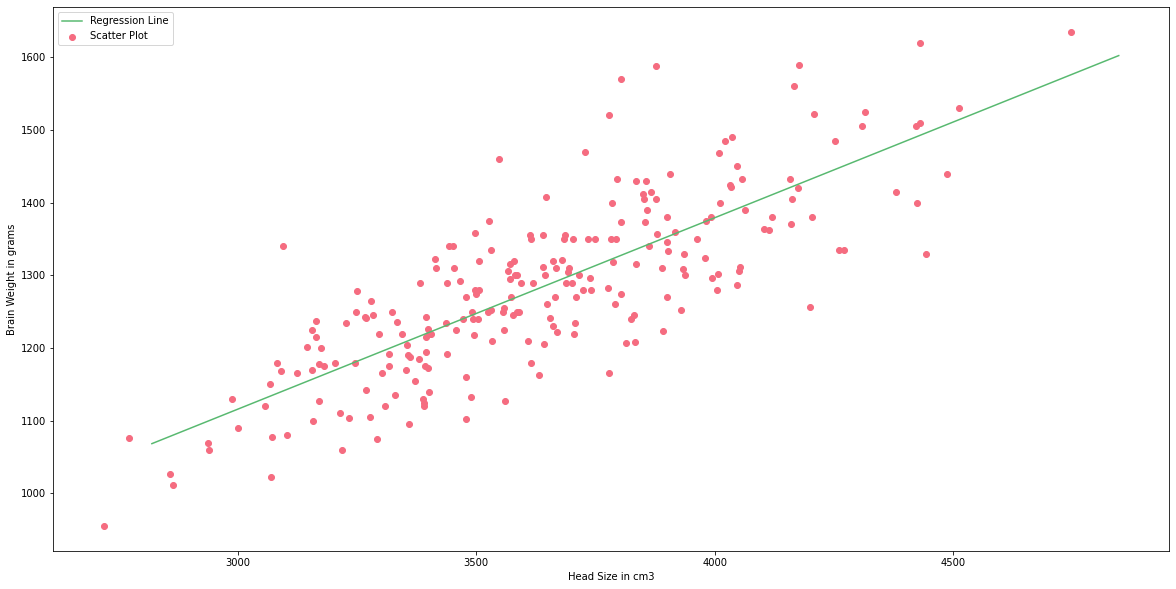

In [27]:
# Plotting values and regression line

max_x = np.max(X) + 100
min_x = np.min(X) + 100

# Calculating line values x and y
x = np.linspace(min_x, max_x, 1000)
y = b0 + b1*x

# Plotting line
plt.plot(x, y, color='#58b970', label='Regression Line')
plt.scatter(X, Y, c='#f56c80', label='Scatter Plot')
plt.xlabel('Head Size in cm3')
plt.ylabel('Brain Weight in grams')
plt.legend()
plt.show()

In [22]:
# Calculate R^2 value

ss_t = 0
ss_r = 0
for i in range(m):
    y_pred = b0 + b1 * X[i]
    ss_t += (Y[i] - mean_y) ** 2
    ss_r += (Y[i] - y_pred) ** 2
r2 = 1 - (ss_r/ss_t)
print(f"R-squared = {r2.round(4)}")

R-squared = 0.6393


In [32]:
# Standardizing regression with Sci-Kit

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Creating a model
X = X.reshape((m,1))
reg = LinearRegression()

# Fitting training data
reg = reg.fit(X, Y)

# Y prediction
Y_pred = reg.predict(X)

# Calculating R2 score
r2_score = reg.score(X, Y)
print("R^2 score = %.4f" % r2_score)

R^2 score = 0.6393


\begin{align*} &\hat{y} = w[0] x[0] + w[1] x[1] + \dotsc + w[p] x[p] + b \text{ (1) linear regression} \end{align*}